In [31]:
"""
Cálculo dos coeficientes de dispersão cromática (β2 = ∂²β/∂ω², β3 = ∂³β/∂ω³, etc) 
em um guia cilíndrico de SiO2 com raio 0.65 μm rodeado por ar ;
e cálculo do coeficiente não-linear: γ = k0 * n2 / A_eff.

Valores simulados no Comsol (Versão 6.3):
neff: Índice de refração efetivo ao longo do eixo principal do guia
A_eff: área efetiva de guiamento

Outros parâmetros:
λ: comprimento de onda (variável independente);
ω: frequência angular da luz (ω = c * λ / (2 π) );
k0: constante de propagação (k0 = c / ω = 2 π / λ);
β: constante de propagação efetiva (β = neff * k0);
n2: índice de refração não linear (†);
c: velocidade da luz no vácuo.

(†) (ver: AGRAWAL, G. P. (2001). Nonlinear Fiber Optics (3rd ed.))
"""

import pandas as pd
import numpy as np
from scipy.constants import c, pi as π

from matplotlib import pyplot as plt

import gc # Coletor de lixo (garbage collector)

Códigos unicode dos símbolos usados:

> Letras gregas

- $\mu$ : 03BC $\quad$  $\beta$ : 03B2

- $\omega$ : 03C9 $\quad$  $\gamma$ : 03B3

- $\lambda$ : 03BB $\quad$  $\pi$ : 03C0

> Símbolos matemáticos

- $\partial$ : 2202 $\quad$ $\int$ : 222B

> Símbolo textual:

- $\dagger$ : 2020

Instrução: Aperte Ctrl + Shift + U, depois insira o código unicode e tecle Enter

In [33]:
# Configuração dos plots:
rc = {"font.family" : "serif",
      "mathtext.fontset" : "stix",
      "axes.labelsize": 8,
      "axes.titlesize": 10,
      "figure.figsize": (7.90354375*0.7, 2),
      "xtick.direction": 'in',
      "xtick.labelsize": 6,
      "ytick.direction": 'in',
      "ytick.labelsize": 6,
      "legend.fontsize": 10,
      "lines.linewidth": 1,
      "lines.markersize": 2,
      "grid.alpha": 0.7,
      "grid.linestyle": '--',
      "grid.linewidth": 0.5,
      "figure.dpi": 200,
      'svg.fonttype': 'none'}

plt.rcParams.update(rc)

# Configurando fonte}
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [34]:
# Leitura de dados
###############
# Dados com simulação no Comsol 6.3
simulação = pd.read_csv("neff1.csv", skiprows=4)

# Tirando % da primeira coluna (formato exportado de header do Comsol)
###############
# Dicionário com nome das colunas de simulação
colunas = dict(zip(simulação.columns,simulação.columns))

# Associando à primeira coluna o seu novo nome, removendo '%':
# separando a expressão no primeiro espaço e pegando o que vem depois.
colunas[simulação.columns[0]] = simulação.columns[0].split(' ', 1)[1]

# Renomeando coluna dos dados
simulação = simulação.rename(columns=colunas)

# Formatando números complexos para leitura do python
simulação = simulação.map(lambda x: complex(x.replace("i", "j")) if type(x)==str else x)

# Imprimindo 5 primeiras linhas
simulação.head()

,wav (m),Effective mode index (1),A_eff (m^2)
0,7.700000e-07,1.397267+0.000000j,9.204846e-13
1,7.720000e-07,1.396965+0.000000j,9.204846e-13
2,7.740000e-07,1.396662+0.000000j,9.204846e-13
3,7.760000e-07,1.396358+0.000000j,9.204846e-13
4,7.780000e-07,1.396055+0.000000j,9.204846e-13


In [35]:
# Índice de refração efetivo
neff = np.real(simulação["Effective mode index (1)"])
# Comprimento de onda
λ = simulação["wav (m)"]

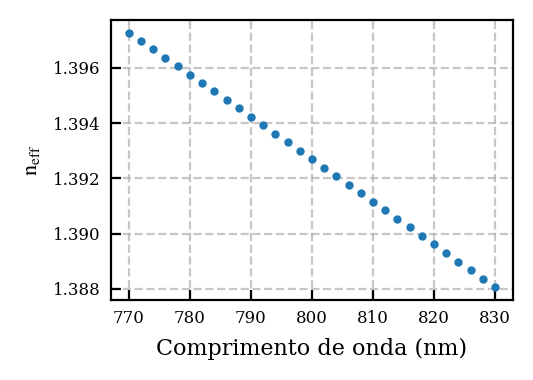

1319

In [57]:
plt.close("neff")
fig, ax = plt.subplots(num = 'neff', figsize = (7.90354375/2*0.7,2), dpi = 200, clear = True)

ax.plot(λ*1e9, # x-axis 
         neff, # y-axis
         '.', # Marker style
           ms = 4 # Marker size
           )


ax.set_ylabel(r"$\mathrm{n_{eff}}$")
ax.set_xlabel(r"Comprimento de onda (nm)")

ax.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()
gc.collect()


In [38]:
# Calculando índice de grupo (ng) a partir do índice efetivo (neff)
###############
# ng == neff - λ * ∂ (neff) / ∂λ
# λ : comprimento de onda

# ∂ (neff) / ∂λ
dn_dλ = np.diff(neff)/np.diff(λ)

# Índice de grupo
ng = neff[:-1] - λ[:-1] * dn_dλ

# Calculando β2 e β3
###############
# β2 = - λ² / (2 π c²) * ∂ (ng) / ∂λ
β2 = - λ[:-2]**2 / (2 * π * c**2) * np.diff(ng)/np.diff(λ[:-1]) # s²/m

# β3 =  - λ² / (2 π c²) * ∂ (β2) / ∂λ
β3 = - λ[:-3]**2 / (2 * π * c**2) * np.diff(β2) / np.diff(λ[:-2]) # s³/m

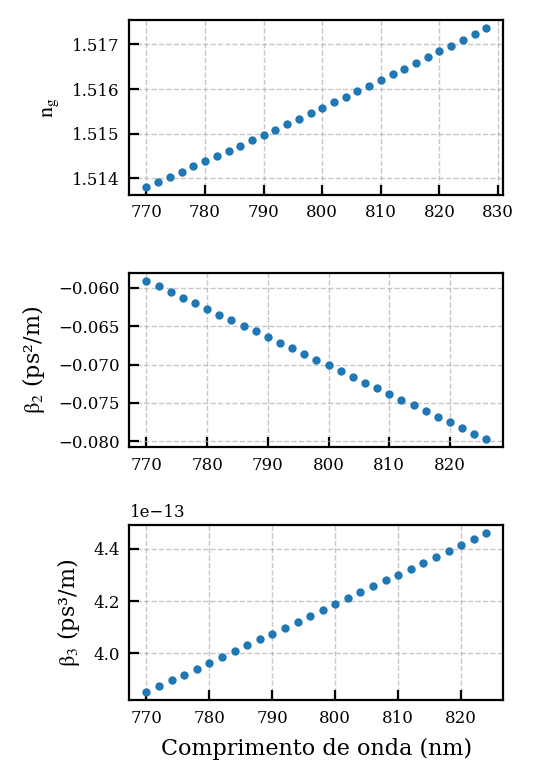

9967

In [47]:
plt.close("Índice de grupo")
fig, ax = plt.subplots(3, 1, num = 'Índice de grupo', figsize = (7.90354375/2*0.7,4), dpi = 200, clear = True)

ax[0].plot(λ[:-1]*1e9, # x-axis
        ng, # y-axis
        '.', # Marker style
        ms = 4 # Marker size
        )

ax[1].plot(λ[:-2]*1e9, # x-axis
        β2*10**24, # y-axis
        '.', # Marker style
        ms = 4 # Marker size
        )

ax[2].plot(λ[:-3]*1e9, # x-axis
        β3*10**36, # y-axis
        '.', # Marker style
        ms = 4 # Marker size
        )

ax[0].set_ylabel(r"$\mathrm{n_g}$")
ax[1].set_ylabel(r"$\mathrm{\beta_2}$ (ps²/m)")
ax[2].set_ylabel(r"$\mathrm{\beta_3}$ (ps³/m)")

ax[-1].set_xlabel(r"Comprimento de onda (nm)")

for axes in ax.flat:
    axes.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()
gc.collect()


In [63]:
# Imprimindo valores de β2 e β3 em 800 nm (comprimento de onda central do pulso Gaussiano);
# 800 nm: λ[15]
print(round(λ[15]*10**9, 3), 'nm')  
print(f"β2(800nm) = {β2[15]*10**24} ps²/m")
print(f"β3(800nm) = {β3[15]*10**36} ps³/m")


800.0 nm
β2(800nm) = -0.0701245716613527 ps²/m
β3(800nm) = 4.18830693714872e-13 ps³/m


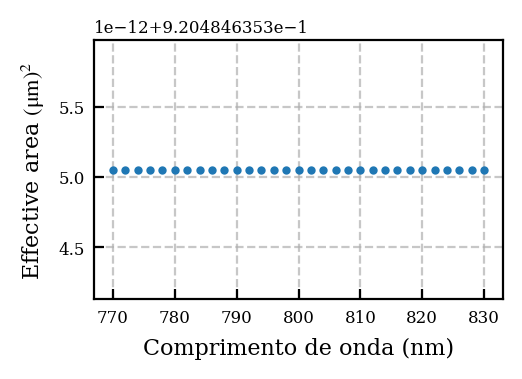

1904

In [40]:
# Área efetiva (A_eff) calculada no Comsol
# A_eff = (∫ |E|² dS)²/(∫ |E|⁴ dS);
# dS: elemento de área transversal ao eixo principal do guia
# A integral é sobre todo a área simulada (modelo 2D)
###############
A_eff = simulação["A_eff (m^2)"]

plt.close("A_eff")
fig, ax = plt.subplots(num = 'A_eff', figsize = (7.90354375/2*0.7,2), dpi = 200, clear = True)

ax.plot(λ*1e9, 
        A_eff*10**12, 
        '.', # Marker style
        ms = 4 # Marker size
        )


ax.set_ylabel(r"Effective area $(\mathrm{\mu m})^2$")
ax.set_xlabel(r"Comprimento de onda (nm)")


ax.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()
gc.collect()


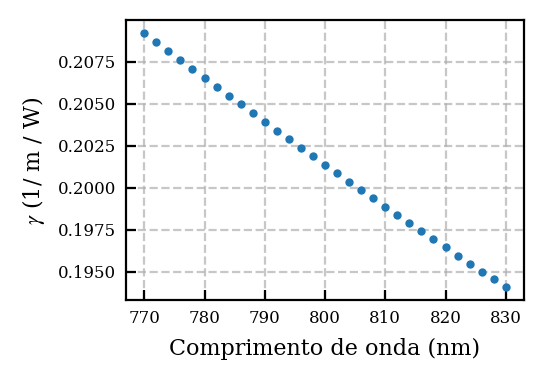

3608

In [44]:
# Cálculo do γ (gamma)
###############
n2  = 2.36 * 10**(-20) # m² / W

γ = (2 * np.pi / λ) * n2 / A_eff # 1 / m / W

plt.close("gamma")
fig, ax = plt.subplots(num = 'gamma', figsize = (7.90354375/2*0.7,2), dpi = 200, clear = True)

ax.plot(λ*1e9, # x-axis
        γ, # y-axis
        '.', # Marker style
        ms = 4 # Marker size
        )

ax.set_ylabel(r"$\gamma$ (1/ m / W) ")
ax.set_xlabel(r"Comprimento de onda (nm)")

ax.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()
gc.collect()


In [62]:
print(f"γ(800nm) = {γ[15]} 1/m/W")


γ(800nm) = 0.2013656278926551 1/m/W
